In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import gensim.downloader as api

In [2]:
# === 1. Setup Awal ===
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Haryanto\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Haryanto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:

# === 2. Load Dataset ===
df = pd.read_csv("ceramah2.csv")  # Pastikan file ini berada di folder kerja
text = " ".join(df['teks'].astype(str))  # kolom 'isi' berisi ceramah

In [4]:
# === 3. Preprocessing ===
tokens = word_tokenize(text.lower())
tokens = [t for t in tokens if t.isalpha()]
tokens = [t for t in tokens if t not in stopwords.words('indonesian')]

In [5]:
# === 4. Ambil 50 kata terbanyak ===
word_counts = Counter(tokens)
top_words = [w for w, _ in word_counts.most_common(50)]

In [6]:
# === 5. Load Pre-trained FastText (100 dimensi, Wikipedia) ===
fasttext_model = api.load("fasttext-wiki-news-subwords-300")  # Bisa juga: "fasttext-wiki-news-subwords-300"

[==================================================] 100.0% 958.5/958.4MB downloaded


In [7]:
# === 6. Ambil vektor kata ===
vectors = np.array([fasttext_model[w] for w in top_words if w in fasttext_model])
labels = [w for w in top_words if w in fasttext_model]


In [8]:
# === 7. PCA untuk reduksi dimensi ===
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

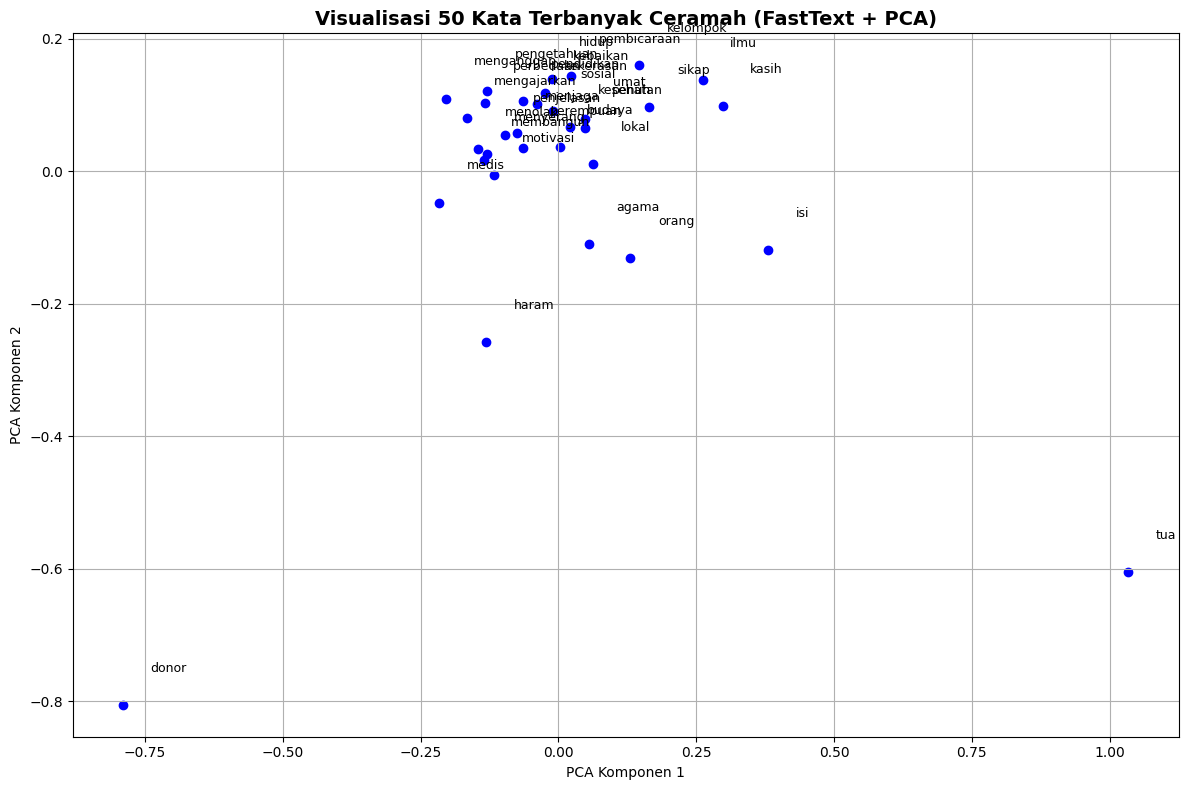

<Figure size 640x480 with 0 Axes>

In [9]:
# === 8. Visualisasi ===
plt.figure(figsize=(12, 8))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], color="blue")

for i, word in enumerate(labels):
    plt.text(vectors_2d[i, 0] + 0.05, vectors_2d[i, 1] + 0.05, word, fontsize=9)

plt.title("Visualisasi 50 Kata Terbanyak Ceramah (FastText + PCA)", fontsize=14, weight='bold')
plt.xlabel("PCA Komponen 1")
plt.ylabel("PCA Komponen 2")
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig("visualisasi_fasttext.png", dpi=300)